# POLI 175 - Machine Learning for Social Sciences

## Python Refresh III

---

# Matplotlib

Matplotlib is the main package for data visualization in Python.

To create a data visualization with matplotlib, we need to load the data into Python. We will work here with the datasets `uspop`, `tips` and `PErisk`.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the datasets

# US Population
uspop = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/uspop.csv', parse_dates = ['year'])
uspop = uspop.set_index('year')

# Political and Economic Risk
perisk = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/PErisk.csv')
perisk = perisk.set_index('country')

# Tips
tips = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/tips.csv')

**Exercise**: Check the head of the datasets. What do we have in each of them?

In [7]:
## Your answer here
uspop.head()

,uspop
year,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


In [5]:
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Australia,1,-6.907755,5,4,10.304840
Austria,1,-4.910337,5,4,10.100940
Bangladesh,0,0.775975,1,0,8.379768
Belgium,1,-4.617344,5,4,10.250120


In [5]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Lineplots

The default plot done by matplotlib is the lineplot. This type of plot is well suited for displaying time-series data, such as stock prices or country populations. Let's check how it works:

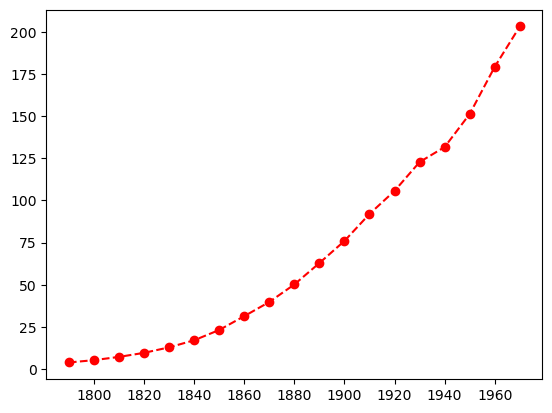

In [11]:
# My code here
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')

plt.show()

### Set Label Text

We can add labels using `set_xlabel` and `set_ylabel`.

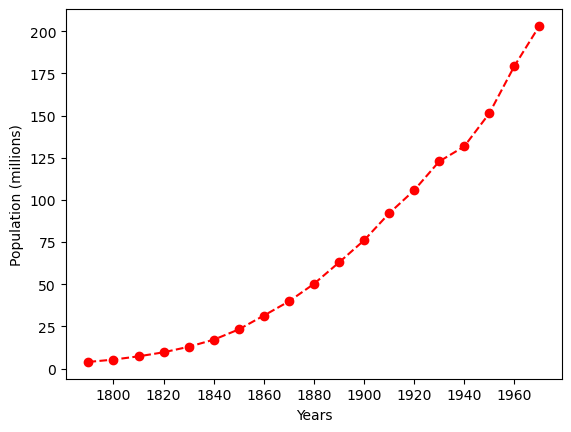

In [12]:
# My code here
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')

ax.set_xlabel('Years')

ax.set_ylabel('Population (millions)')

plt.show()

### Two plots in the same graph

Now, let us create the log of the population and add to the data:

In [14]:
# My code here
uspop['logpop'] = np.log(uspop['uspop'])
uspop

,uspop,logpop
year,,
1790-01-01,3.93,1.368639
1800-01-01,5.31,1.669592
1810-01-01,7.24,1.979621
1820-01-01,9.64,2.265921
1830-01-01,12.90,2.557227
1840-01-01,17.10,2.839078
1850-01-01,23.20,3.144152
1860-01-01,31.40,3.446808
1870-01-01,39.80,3.683867


We can put the plots together, changing the scale in the left and right hand sides. This is very useful to plot time series that have different axis values:

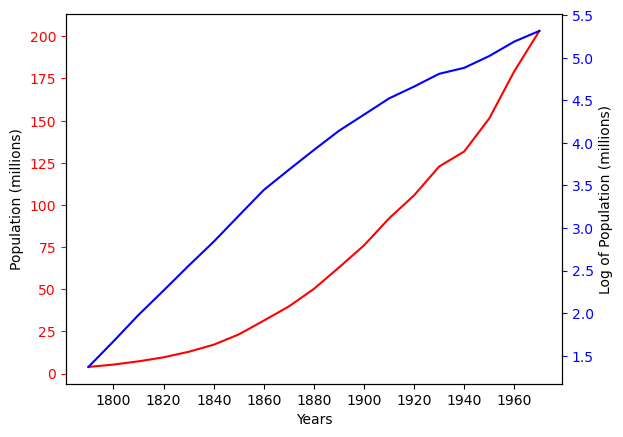

In [16]:
# My code here

fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red')

ax.set_ylabel('Population (millions)')

ax.tick_params('y', colors = 'red')

ax.set_xlabel('Years')

ax2 = ax.twinx()

ax2.plot(uspop.index, uspop['logpop'], color = 'blue')

ax2.set_ylabel('Log of Population (millions)')

ax2.tick_params('y', colors = 'blue')

plt.show()

## Bar-Charts

Bar-plots are useful to see the frequency in variables:

In [19]:
# My code here
perisk['exprisk'] = 5 - perisk['prsexp2']
tab = perisk['exprisk'].value_counts(sort = False)
tab

4     6
0    14
5     2
1    14
2    19
3     7
Name: exprisk, dtype: int64

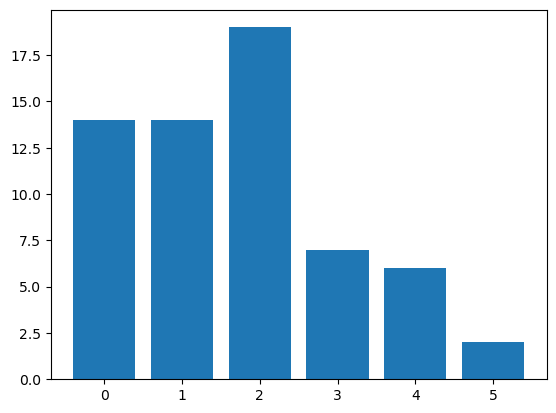

In [20]:
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

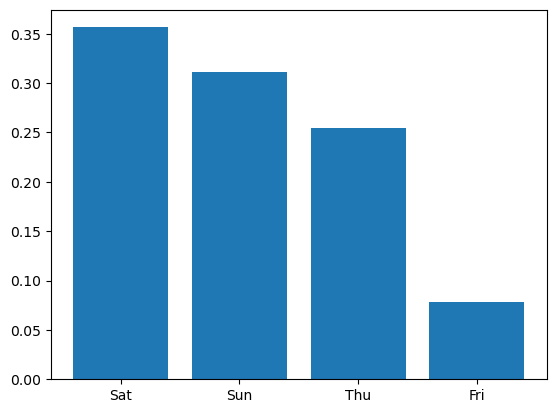

In [27]:
tips.head()
tab = tips['day'].value_counts(normalize = True)
tab
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

**Exercise**: Do the same bar-chart with weekdays in the `tips` dataset.

In [26]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


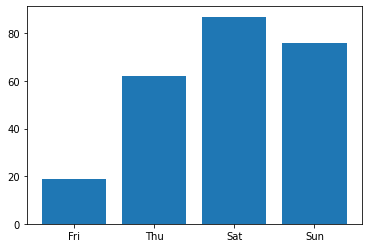

In [27]:
tab = tips['day'].value_counts(sort = False)

# Build the actual plot
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

## Histograms

To visualize numeric variables, the histogram is the best plot. For instance, here is a histogram of the log of gdp:

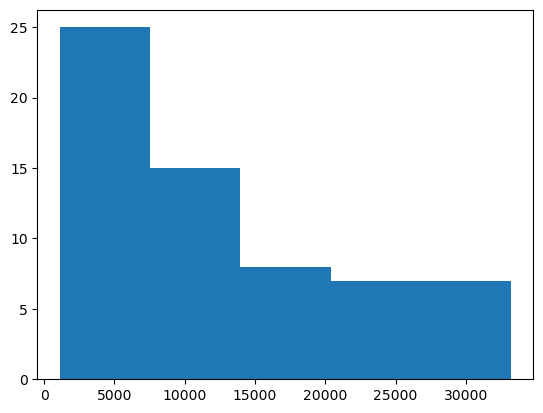

In [40]:
perisk['corrisk'] = 5 - perisk['prscorr2']
# My code here
fig, ax = plt.subplots()

ax.hist(np.exp(perisk['gdpw2']), bins = 5)

plt.show()

In [29]:
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2,exprisk
country,,,,,,
Argentina,0,-0.720775,1,3,9.690170,4
Australia,1,-6.907755,5,4,10.304840,0
Austria,1,-4.910337,5,4,10.100940,0
Bangladesh,0,0.775975,1,0,8.379768,4
Belgium,1,-4.617344,5,4,10.250120,0


We can even add multiple variables to our plot:

In [9]:
# My code here

**Exercise**: Create a histogram of tips and total bill.

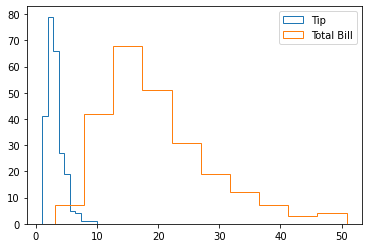

In [35]:
## Your code here
fig, ax = plt.subplots()

ax.hist(tips['tip'], bins = 10, histtype = 'step', label = "Tip")

ax.hist(tips['totbill'], bins = 10, histtype = 'step', label = "Total Bill")

ax.legend()

plt.show()

## Box-plots

To visualize numeric variables, the box-plots are also great plots:

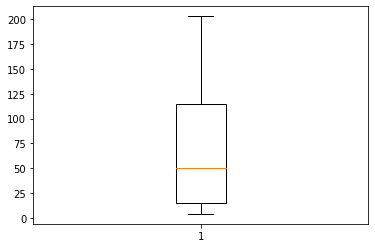

In [38]:
# My code here
fig, ax = plt.subplots()

ax.boxplot(uspop['uspop'])

plt.show()

**Exercise**: Create a boxplot of tips and total bill.

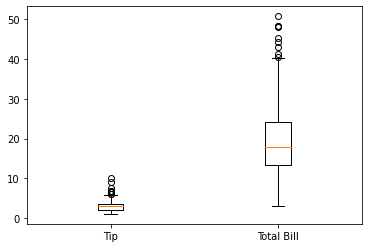

In [40]:
## Your code here
fig, ax = plt.subplots()

ax.boxplot([tips['tip'], tips['totbill']])

ax.set_xticklabels(['Tip', 'Total Bill'])

plt.show()

## Scatter-plots

Scatter-plots are great to display numeric x numeric relationships.

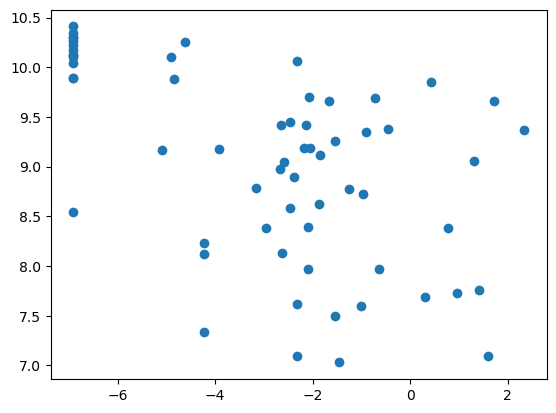

In [42]:
# My code here
fig, ax = plt.subplots()

ax.scatter(perisk['barb2'], perisk['gdpw2'])

plt.show()

**Exercise**: Plot a scatter of total bill x tip in the tips dataset. Then color by the week day.

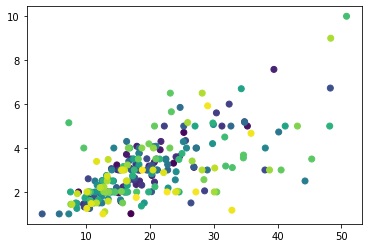

In [48]:
## Your code here
fig, ax = plt.subplots()

ax.scatter(tips['totbill'], tips['tip'], c = tips['obs'])

plt.show()

**Great job!!!**